<a href="https://colab.research.google.com/github/mark3000-010701/The-study-proposes-machine-learning-methods-in-structural-damage-detection/blob/main/test_model_ANN_with_AR30_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split

đọc dữ liệu

In [68]:
df_damag = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_AR/Z24_12_avt_ar_lags30.csv')
df_damag.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.215391,-1.988158,0.326786,-2.225446,0.361410,-1.722394,0.428749,-0.790013,0.470387,-0.037052,...,0.154444,0.594432,0.196298,0.512117,0.161310,0.363328,0.093523,0.179487,0.030643,0.054789
1,0.015273,-1.615242,-0.073862,-1.493956,0.010926,-0.906206,0.194786,-0.077323,0.323855,0.288718,...,-0.168721,0.236515,0.060803,0.350101,0.142934,0.337634,0.111244,0.197976,0.037547,0.071206
2,0.018031,-1.717028,-0.114767,-1.811428,-0.109287,-1.250645,-0.090195,-0.358772,0.022506,0.214969,...,0.017743,0.357151,0.120442,0.401228,0.133294,0.356671,0.092019,0.217800,0.020101,0.086484
3,0.491214,-1.563688,0.920167,-1.650692,1.136241,-0.914208,0.922570,0.013923,0.509549,0.536455,...,-0.114276,0.400581,-0.072637,0.357473,-0.065151,0.238467,-0.074727,0.110160,-0.040050,0.032473
4,0.283590,-1.714851,0.543299,-2.046903,0.659876,-1.504479,0.644691,-0.567616,0.503193,0.114813,...,-0.432876,0.348140,-0.138496,0.419232,0.001883,0.329414,0.017724,0.172469,0.003575,0.049221


In [69]:
df_damag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       291 non-null    float64
 1   1       291 non-null    float64
 2   2       291 non-null    float64
 3   3       291 non-null    float64
 4   4       291 non-null    float64
 5   5       291 non-null    float64
 6   6       291 non-null    float64
 7   7       291 non-null    float64
 8   8       291 non-null    float64
 9   9       291 non-null    float64
 10  10      291 non-null    float64
 11  11      291 non-null    float64
 12  12      291 non-null    float64
 13  13      291 non-null    float64
 14  14      291 non-null    float64
 15  15      291 non-null    float64
 16  16      291 non-null    float64
 17  17      291 non-null    float64
 18  18      291 non-null    float64
 19  19      291 non-null    float64
 20  20      291 non-null    float64
 21  21      291 non-null    float64
 22  22

In [70]:
df_normal = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_AR/Z24_01_avt_ar_lags30.csv')
df_normal.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.188551,-1.831313,0.269703,-1.899566,0.367822,-1.337485,0.560015,-0.447530,0.601489,0.136189,...,0.045936,0.465558,0.193725,0.505233,0.222883,0.420898,0.188927,0.257299,0.079685,0.093056
1,0.001323,-1.513705,-0.025424,-1.286226,0.214456,-0.595287,0.541101,0.292676,0.626366,0.556689,...,0.010720,0.587200,0.329819,0.662693,0.380200,0.506202,0.297332,0.241586,0.120309,0.059965
2,0.042113,-1.560507,-0.053504,-1.487476,0.059937,-0.825542,0.197459,0.073489,0.307278,0.492737,...,0.016416,0.507250,0.232045,0.633422,0.277323,0.553907,0.254098,0.328015,0.113745,0.119630
3,0.288522,-1.524582,0.452929,-1.551784,0.527094,-0.808047,0.428855,0.051967,0.283276,0.425607,...,-0.230640,0.531735,-0.038901,0.568340,0.058347,0.424846,0.080205,0.212624,0.050079,0.057377
4,0.374052,-1.567791,0.713601,-1.718501,0.873121,-1.098372,0.808788,-0.284880,0.514294,0.092092,...,-0.379367,0.577784,-0.198218,0.455401,-0.100408,0.223588,-0.034277,0.043612,-0.002408,-0.025903


In [71]:
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       289 non-null    float64
 1   1       289 non-null    float64
 2   2       289 non-null    float64
 3   3       289 non-null    float64
 4   4       289 non-null    float64
 5   5       289 non-null    float64
 6   6       289 non-null    float64
 7   7       289 non-null    float64
 8   8       289 non-null    float64
 9   9       289 non-null    float64
 10  10      289 non-null    float64
 11  11      289 non-null    float64
 12  12      289 non-null    float64
 13  13      289 non-null    float64
 14  14      289 non-null    float64
 15  15      289 non-null    float64
 16  16      289 non-null    float64
 17  17      289 non-null    float64
 18  18      289 non-null    float64
 19  19      289 non-null    float64
 20  20      289 non-null    float64
 21  21      289 non-null    float64
 22  22

In [72]:
df_normal.shape

(289, 30)

Chuẩn bị dữ liệu đào tạo

In [73]:
type(df_normal.values)

numpy.ndarray

In [74]:
all_data = np.concatenate([df_normal.values, df_damag.values])


In [75]:
all_data.shape

(580, 30)

In [76]:
Y_normal = np.ones(df_normal.shape[0])
Y_damag =  np.zeros(df_damag.shape[0])
Y_all = np.concatenate([Y_normal, Y_damag])
Y_all.shape

(580,)

In [77]:
Y_all

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

chia dữ liệu thành các tập train , test

In [78]:
X_train, X_test, y_train, y_test = train_test_split(all_data, Y_all, test_size=0.2, random_state=0)


In [79]:
y_test

array([0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.])

build model

In [80]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
   
    keras.layers.Dense(10, activation=tf.nn.relu),	  
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

build,complie model

In [81]:
model.build()
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 30)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                310       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

train

In [ ]:
hist = model.fit(X_train, y_train, epochs=100, batch_size=1, validation_data=(X_test, y_test))


In [84]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


vẽ đồ thị loss, accuracy

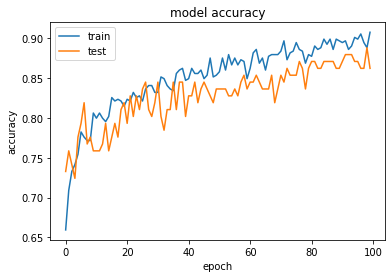

In [85]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

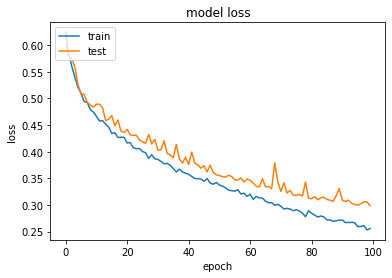

In [86]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [87]:
test_loss, test_acc = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.2989 - accuracy: 0.8621


predict 1 kết quả trong z24_01

In [88]:
x_1 = [0.17644537264039523,-1.7914511851776163,0.20397587340085682,-1.7611032513544493,0.30335108027648106,-1.170955078904942,0.4815675607773132,-0.3769442707375599,0.5293446574273206,0.09682858795264085,0.31748191727933534,0.2424927083890882,0.019134891255532114,0.18809748811581697,-0.15442541906424853,0.14778794409045629,-0.18614266471773722,0.2097416099489675,-0.14005918679594986,0.3796556344901386,-0.08026914660934377,0.4941631383260321,0.02101999513076799,0.5235397716339107,0.07123522093060417,0.4304348620919603,0.09631571340665866,0.25886516846104374,0.05109819361319568,0.08864314660891977]
y_pred = model.predict([x_1])
y_pred

array([[0.5001981]], dtype=float32)

nhận dạng

In [89]:
"damag" if y_pred[0][0]<0.5 else "normal"


'normal'

predict 1 kết quả trong z24_12

In [90]:
sx_2 = [0.2835897113088593,-1.7148511361538081,0.5432986638231844,-2.046902661597781,0.6598758563566534,-1.5044789374167014,0.6446912300788621,-0.5676157122059278,0.5031927522818574,0.11481349304288965,0.06090936042060972,0.2684891757786505,-0.5281901898330873,0.14069628323834343,-0.9734340296217439,-0.01412047642339844,-1.0832985901855652,-0.009139680332590851,-0.8463876466312291,0.16337271835828593,-0.43287623541608294,0.34813996014236825,-0.13849620608795407,0.41923173407941583,0.001883041318729983,0.3294143922472575,0.017723714274308935,0.1724690137913958,0.0035751790393603817,0.049220954392151565]
y_pred = model.predict([sx_2])
y_pred

array([[0.00164086]], dtype=float32)

In [91]:
"damag" if y_pred[0][0]<0.5 else "normal"


'damag'

In [92]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix


In [93]:
import seaborn as sns

In [107]:
X_test.shape

(116, 30)

In [108]:
def print_scores(model, labels, pred):
    # Confusion matrix
    accuracy = round(accuracy_score(labels, pred), 4)
    precision = round(precision_score(labels, pred), 4)    
    recall = round(recall_score(labels, pred), 4)
    f1 = round(f1_score(labels, pred), 4)
    
    cm = confusion_matrix(labels, pred)
    data = pd.DataFrame(cm)
    
    labels = [f"TP: {all_data[0][0]} ",f"FN: {all_data[1][1]} ",f"FP: {all_data[1][0]} ",f"TN: {all_data[0][1]} "]
    labels = np.asarray(labels).reshape(2,2)
    
    f, ax = plt.subplots(figsize=(6,5))
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', ax=ax)    
    print(f"{model}:: Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, f1_score: {f1}")

ANN:: Accuracy: 0.8621, Precision: 0.8491, Recall: 0.8491, f1_score: 0.8491


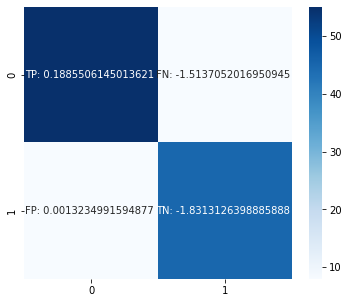

In [113]:
y_pre_ann = model.predict(X_test)
y_pre_ann_bool = y_pre_ann > 0.5
print_scores('ANN',y_test,y_pre_ann_bool)

In [114]:
y_pre_ann_bool.shape

(116, 1)

In [ ]:
y_pre_ann_bool